In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# I splitted the data to 5 million rows for users and games and 2000 rows of reocmmendations


In [21]:

recommendations_df = pd.read_csv('data/downsized/recommendations.csv')
games_df = pd.read_csv('data/downsized/games.csv')
users_df = pd.read_csv('data/downsized/users.csv')

Text(0, 0.5, 'Reviews')

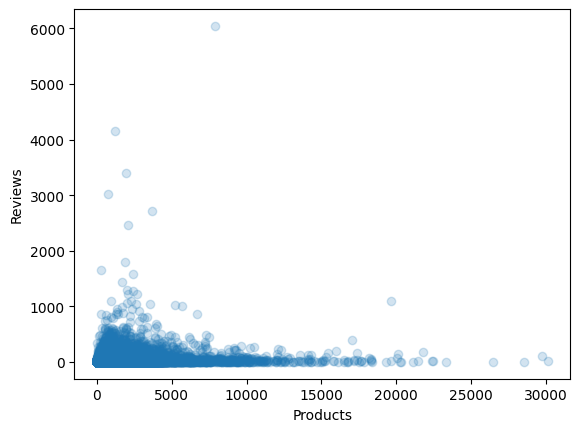

In [28]:
# plot x as user products and y as reviews scatterplot

plt.scatter(users_df['products'], users_df['reviews'], alpha=0.2)
plt.xlabel('Products')
plt.ylabel('Reviews')   

In [29]:

# Calculating correlation and p-value
correlation, p_value = pearsonr(users_df['products'], users_df['reviews'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.2706182202793897
P-value: 0.0


196424 2176516
Pearson Correlation Coefficient: 0.21544123735008985
P-value: 0.0


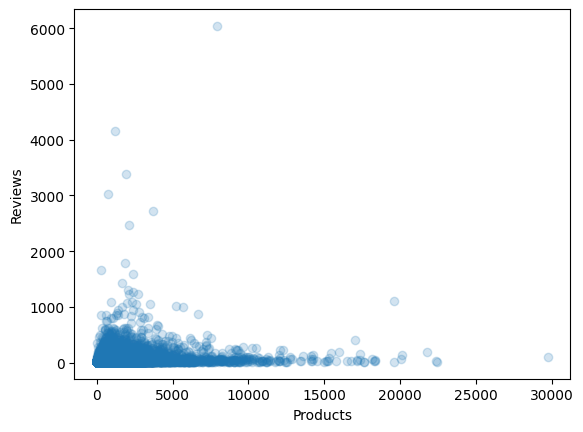

In [35]:
# How about from the standpoint of view from whereas users have at least 10 reviews?
reviewers_df = users_df[users_df['reviews'] > 10]
print(len(reviewers_df), len(users_df))
plt.scatter(reviewers_df['products'], reviewers_df['reviews'], alpha=0.2)
plt.xlabel('Products')
plt.ylabel('Reviews')


correlation, p_value = pearsonr(reviewers_df['products'], reviewers_df['reviews'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

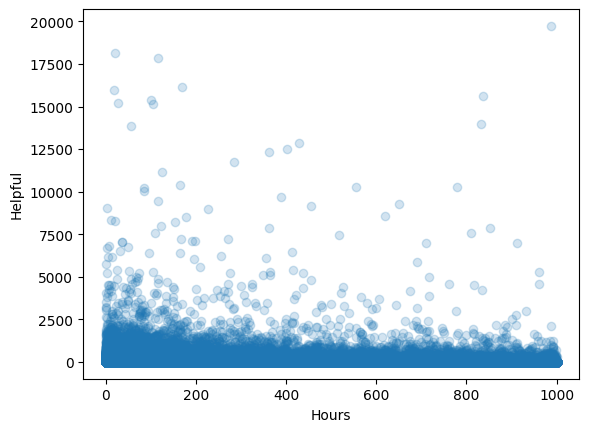

In [36]:
# - Does players with more hours played provide more helpful reviews? What is the relation between hours played and the review result?

plt.scatter(recommendations_df['hours'], recommendations_df['helpful'], alpha=0.2)
plt.xlabel('Hours')
plt.ylabel('Helpful')
plt.show()


In [38]:

# Calculating correlation and p-value
correlation, p_value = pearsonr(recommendations_df['hours'], recommendations_df['helpful'])
print('Correlation', correlation)
print("P-value: {:.4f}".format(p_value))

Correlation 0.007193694720238997
P-value: 0.0000
